170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,508 (486.36 KB)

 Trainable params: 124,508 (486.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.2355 - f_beta: 0.0640 - loss: 2.0078 - val_accuracy: 0.4937 - val_f_beta: 0.3311 - val_loss: 1.3732
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.4824 - f_beta: 0.3660 - loss: 1.4288 - val_accuracy: 0.5822 - val_f_beta: 0.5126 - val_loss: 1.1798
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.5637 - f_beta: 0.4893 - loss: 1.2498 - val_accuracy: 0.6015 - val_f_beta: 0.5632 - val_loss: 1.1188
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.6205 - f_beta: 0.5709 - loss: 1.1073 - val_accuracy: 0.6404 - val_f_beta: 0.6061 - val_loss: 1.0590
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - accuracy: 0.6580 - f_beta: 0.6196 - loss: 1.0082 - val_accuracy: 0.6526 - val_f_beta: 0.6232 - val_loss: 1.0011
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - accuracy: 0.6830 - f_beta: 0.6500 - loss: 0.9422 - val_accuracy: 0.6530 - val_f_beta: 0.6417

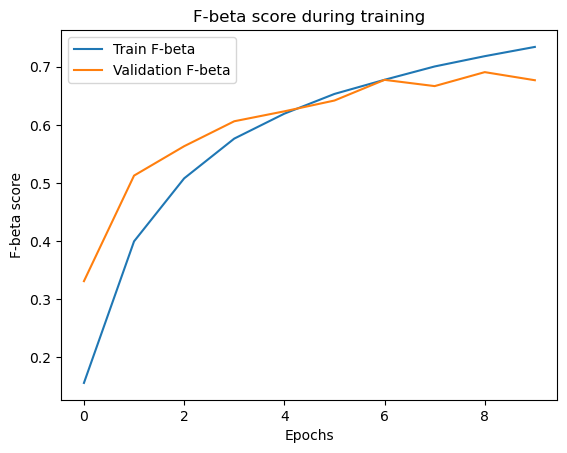

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# بارگذاری دیتاست CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# نمایش شیپ تصاویر و برچسب‌ها
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# نرمالیزه کردن داده‌ها
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# تبدیل برچسب‌ها به نوع one-hot
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# تعریف معیار F-beta
class FBetaScore(tf.keras.metrics.Metric):
    def __init__(self, beta=1, name="f_beta", **kwargs):
        super(FBetaScore, self).__init__(name=name, **kwargs)
        self.beta = beta
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        # جلوگیری از تقسیم بر صفر
        epsilon = tf.keras.backend.epsilon()
        precision += epsilon
        recall += epsilon
        return (1 + self.beta**2) * (precision * recall) / (self.beta**2 * precision + recall)

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# ساخت مدل با ۳ لایه مخفی و ۵۰ نورون در هر لایه
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # لایه‌های fully connected
    model.add(layers.Flatten())
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # لایه خروجی با softmax برای طبقه‌بندی چندکلاسه
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# تعریف ورودی مدل
input_shape = (32, 32, 3)  # CIFAR-10 دارای تصاویر با ابعاد 32x32 و 3 کانال رنگی
num_classes = 10  # تعداد کلاس‌های CIFAR-10

# ساخت مدل
model = create_model(input_shape, num_classes)

# کامپایل مدل
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', FBetaScore(beta=1)])

# نمایش ساختار مدل
model.summary()

# توقف زودهنگام برای جلوگیری از بیش‌آموزی
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# آموزش مدل
history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping])

# ارزیابی مدل
test_loss, test_acc, test_fbeta = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test F-beta score: {test_fbeta}")

# نمایش F-beta score روی داده‌های train و validation در طول اپوچ‌ها
import matplotlib.pyplot as plt

plt.plot(history.history['f_beta'], label='Train F-beta')
plt.plot(history.history['val_f_beta'], label='Validation F-beta')
plt.title('F-beta score during training')
plt.xlabel('Epochs')
plt.ylabel('F-beta score')
plt.legend()
plt.show()
